In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Carregar os dados para dataframe

df_salario = pd.read_csv("./dataset/1702317703683-attachment.csv")

In [7]:
df_salario

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
0,50,1,2288.13
1,49,4,2389.84
2,39,10,2158.73
3,51,1,2341.06
4,62,7,3584.20
...,...,...,...
995,5,10,1037.35
996,7,2,668.01
997,118,6,17511.13
998,94,10,8938.96


In [8]:
df_salario.head(5)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
0,50,1,2288.13
1,49,4,2389.84
2,39,10,2158.73
3,51,1,2341.06
4,62,7,3584.20


In [9]:
df_salario.describe()

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
count,1000.000000,1000.000000,1000.000000
mean,59.712000,5.467000,5093.726110
std,34.027679,2.889509,4536.168857
min,1.000000,1.000000,538.560000
25%,30.750000,3.000000,1537.477500
50%,60.000000,6.000000,3237.920000
75%,89.000000,8.000000,7436.680000
max,120.000000,10.000000,18923.230000


In [10]:
df_salario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempo_na_empresa  1000 non-null   int64  
 1   nivel_na_empresa  1000 non-null   int64  
 2   salario_em_reais  1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [11]:
df_salario_eda = df_salario.copy()

In [12]:
df_salario_bucketing = df_salario.copy()

In [13]:
df_salario_eda.head(5
                    )

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
0,50,1,2288.13
1,49,4,2389.84
2,39,10,2158.73
3,51,1,2341.06
4,62,7,3584.20


### EDA

In [14]:
# verificar se temos valores ausentes

df_salario_eda.isna().sum()

tempo_na_empresa    0
nivel_na_empresa    0
salario_em_reais    0
dtype: int64

<Axes: xlabel='tempo_na_empresa'>

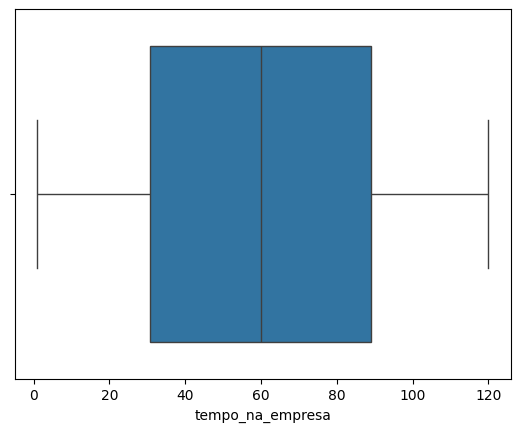

In [15]:
# detectar outliers

sns.boxplot(df_salario_eda, x='tempo_na_empresa')

<Axes: xlabel='nivel_na_empresa'>

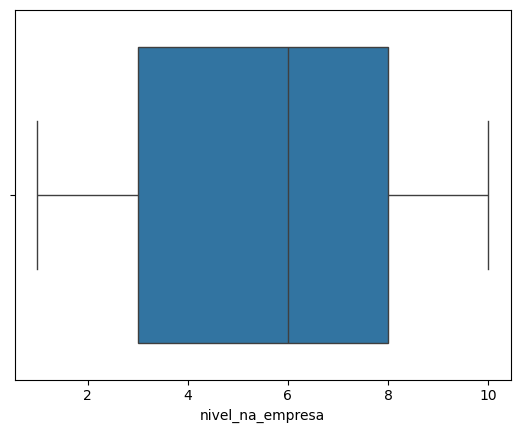

In [16]:
sns.boxplot(df_salario_eda, x='nivel_na_empresa')


<Axes: xlabel='salario_em_reais'>

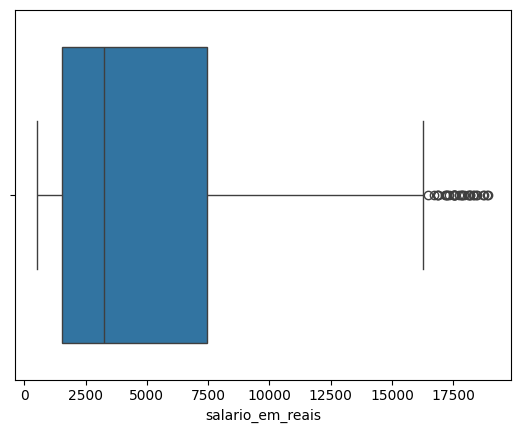

In [17]:
sns.boxplot(df_salario_eda, x='salario_em_reais')


mesmo com outliers na variavel salario em reais apos uma conversa com RH foi confirmado que esse valores sao validos e realmente existem

<Axes: xlabel='tempo_na_empresa', ylabel='salario_em_reais'>

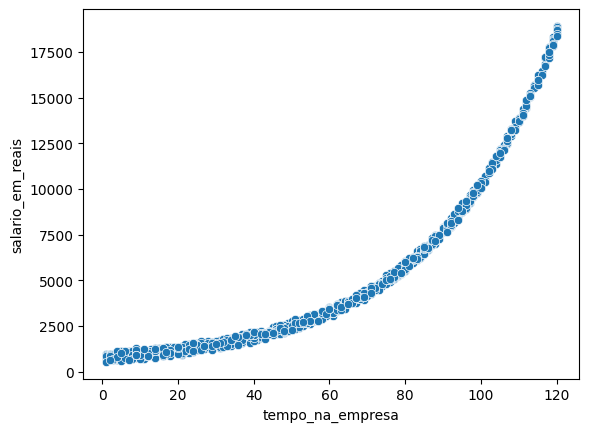

In [18]:
#fazendo cruzamento de variaveis numericas
sns.scatterplot(data=df_salario_eda, x='tempo_na_empresa', y='salario_em_reais')

<Axes: xlabel='nivel_na_empresa', ylabel='salario_em_reais'>

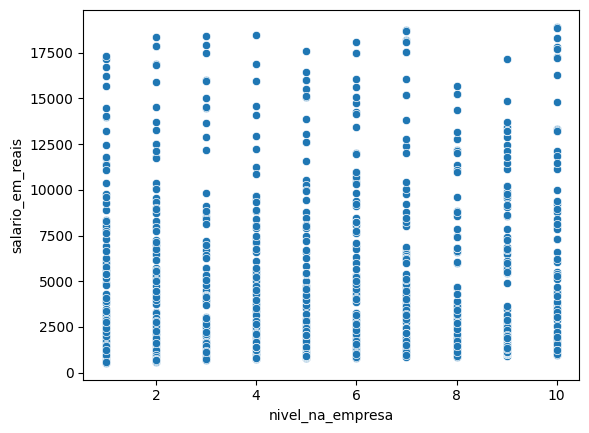

In [19]:
sns.scatterplot(data=df_salario_eda, x='nivel_na_empresa', y='salario_em_reais')


<Axes: xlabel='tempo_na_empresa', ylabel='nivel_na_empresa'>

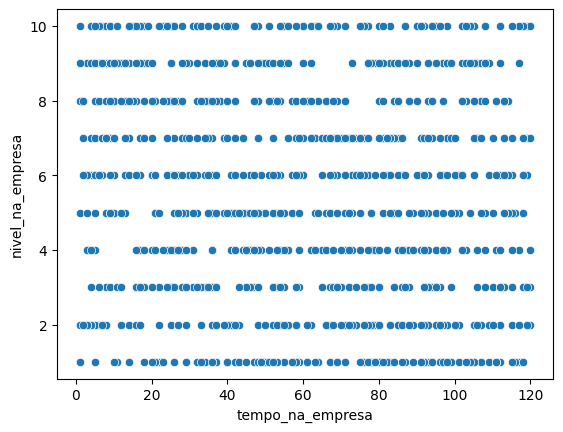

In [20]:
sns.scatterplot(data=df_salario_eda, x='tempo_na_empresa', y='nivel_na_empresa')


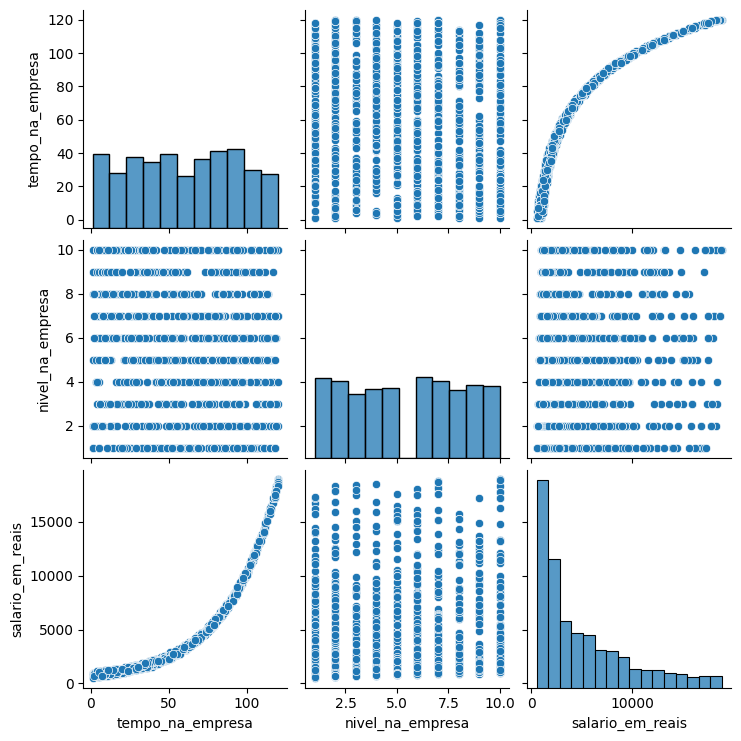

In [21]:
#pairplot para mostrar todos graficos juntos
sns.pairplot(df_salario_eda)

<Axes: >

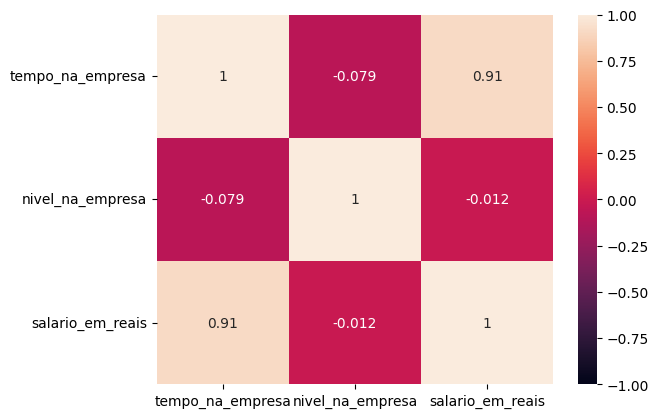

In [22]:
#Nivel de correlação
#mapa de calor

sns.heatmap(df_salario_eda.corr(), vmin=-1,vmax=1,annot=True)

<Axes: >

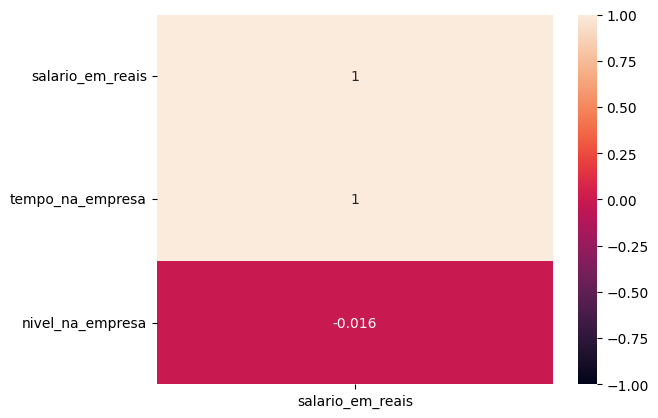

In [23]:
#mapa de calor em ranking

sns.heatmap(df_salario_eda.corr('spearman')[['salario_em_reais']].sort_values(by='salario_em_reais', ascending=False), vmin=-1,vmax=1, annot=True)

usando spearman que é melhor para valores lineares ou seja indicativo grande que esses dados nao semguem uma distribuição linear

In [24]:
#Bucketing

bins_tempo_empresa = [0,10,20,30,40,50,60,70,80,90,100,110,120,130]
labels_tempo_empresa = [
    "0-9", "10-19", "20-29", "30-39", "40-49", "50-59", 
    "60-69", "70-79", "80-89", "90-99", "100-109", "110-119", "120-129"
]
df_salario_bucketing['escala_tempo']= pd.cut(x=df_salario_bucketing['tempo_na_empresa'], bins=bins_tempo_empresa,labels=labels_tempo_empresa,include_lowest=True)


In [25]:
df_salario_bucketing.head(5)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais,escala_tempo
0,50,1,2288.13,40-49
1,49,4,2389.84,40-49
2,39,10,2158.73,30-39
3,51,1,2341.06,50-59
4,62,7,3584.20,60-69


<Axes: xlabel='escala_tempo', ylabel='salario_em_reais'>

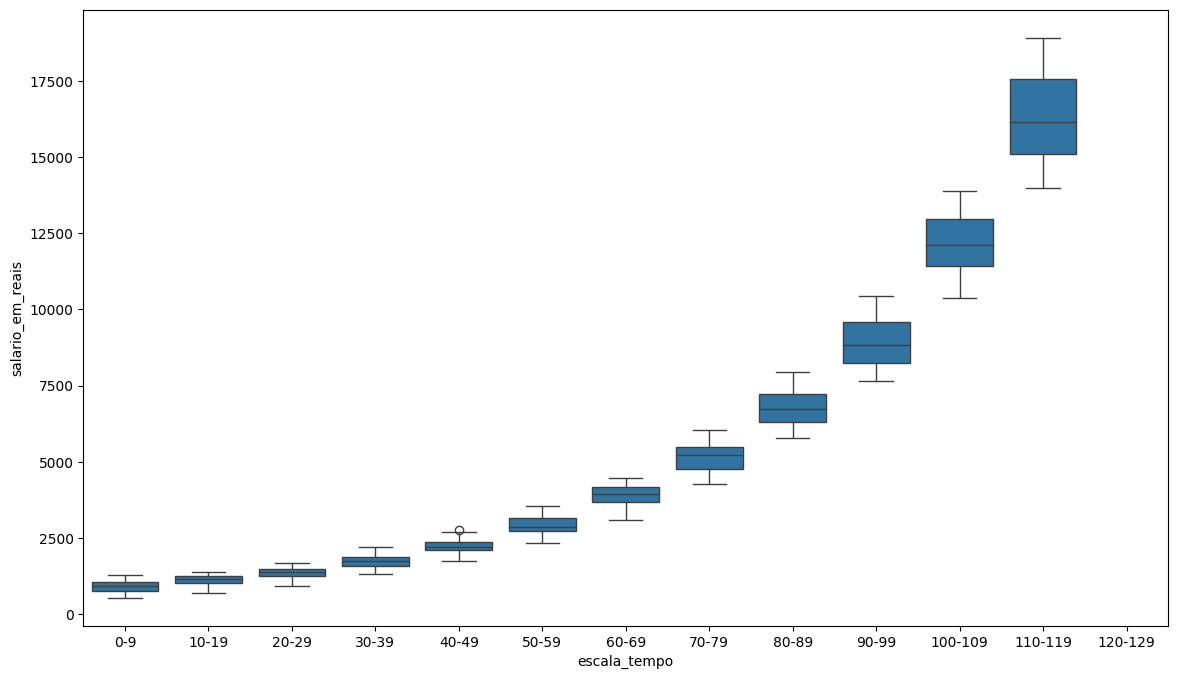

In [26]:
plt.figure(figsize=(14,8))
sns.boxplot(df_salario_bucketing, x='escala_tempo', y='salario_em_reais')

EDA Concluida

### Treinar modelo Linear

In [27]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

import numpy as np

In [29]:
# Dividir o dataset em treino e teste

X = df_salario.drop(columns='salario_em_reais', axis=1)
y = df_salario['salario_em_reais']


Você divide seus dados em K partes (ou "folds").
O modelo é treinado e testado K vezes, cada vez com uma parte diferente como teste.

📦 Exemplo com K=5:

Divide os 100 dados em 5 partes de 20.

Na 1ª vez: usa os 20 da 1ª parte como teste e os outros 80 como treino.

Na 2ª vez: os 20 da 2ª parte viram teste, e o resto vira treino.

E assim vai, até todas as partes terem sido usadas como teste uma vez.



In [33]:
kf = KFold(n_splits=5, shuffle=True, random_state=51)

In [ ]:
#Bloco para treinamento do modelo

#pipeline para padronizar as variaveis numericas

#Nome das colunas
colunas_numericas = ['tempo_na_empresa', 'nivel_na_empresa']

# Transformes para colunas numericas 
transformer_numericas = Pipeline(steps=[
  ('scaler', StandardScaler())
])

# criar um ColumnTransformer

preprocessor = ColumnTransformer(
  transformers=[
    ('nume', transformer_numericas, colunas_numericas)
  ]
)

# Criando o pipeline principal = Pre processamento + Treinamento

model_regr = Pipeline(steps=[('preprocessor', preprocessor )
                             ('regressor', LinearRegression())])
